In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install pandas numpy seaborn matplotlib plotly


In [ ]:
import locale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read data from a csv file
df = pd.read_csv('/content/cmu-sleep.csv')
df

,subject_id,study,cohort,demo_race,demo_gender,demo_firstgen,bedtime_mssd,TotalSleepTime,midpoint_sleep,frac_nights_with_data,daytime_sleep,cum_gpa,term_gpa,term_units,Zterm_units_ZofZ
0,185,5,lac1,1,1,0,0.116727,432.200000,458.660000,0.862069,24.160000,3.000000,3.380000,73,4.055294859
1,158,5,lac1,0,1,0,0.141681,391.931035,364.465517,1.000000,13.137931,3.660000,2.600000,64,2.482534122
2,209,5,lac1,1,1,0,1.529289,344.304348,560.891304,0.793103,14.956522,3.570000,3.070000,63,2.30778293
3,102,5,lac1,0,1,1,0.130148,392.620690,416.482759,1.000000,54.551724,3.610000,3.560000,61,1.958280544
4,174,5,lac1,1,1,0,0.130181,423.421053,368.763158,0.655172,10.526316,3.210000,4.000000,61,1.958280544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,99978,4,nh,0,0,0,0.091325,383.448276,407.931035,0.966667,44.344828,3.722167,3.611333,,
630,61,2,uw1,0,1,,0.045369,477.894737,331.315789,0.678571,23.631579,3.868182,3.650000,10,-1.80457982
631,172,2,uw1,1,1,,0.075429,407.153846,387.269231,0.928571,12.384615,3.727272,3.600000,15,0.373361342
632,110,2,uw1,1,0,,0.200289,397.125000,487.583333,0.857143,99.541667,3.337500,3.538461,13,-0.497815123


In [ ]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (634, 15)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
subject_id,int64,0,0.0,0,547,634,1.0,99978.0,13005.892744,26496.593477,185,158,209
study,int64,0,0.0,0,5,634,1.0,5.0,3.181388,1.317125,5,5,5
cohort,object,0,0.0,0,5,634,NaN,NaN,NaN,NaN,lac1,lac1,lac1
demo_race,object,0,0.0,0,3,634,NaN,NaN,NaN,NaN,1,0,1
demo_gender,object,0,0.0,0,3,634,NaN,NaN,NaN,NaN,1,1,1
demo_firstgen,object,0,0.0,0,4,634,NaN,NaN,NaN,NaN,0,0,0
bedtime_mssd,float64,0,0.0,0,633,634,0.004505,20.849225,0.451688,1.393632,0.116727,0.141681,1.529289
TotalSleepTime,float64,0,0.0,0,625,634,194.782609,587.666667,397.323874,50.856725,432.2,391.931035,344.304348
midpoint_sleep,float64,0,0.0,0,629,634,247.071429,724.666667,398.679186,72.710945,458.66,364.465517,560.891304
frac_nights_with_data,float64,0,0.0,0,59,634,0.214286,1.0,0.867439,0.17896,0.862069,1.0,0.793103


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 634
Variables: 15
cat_cols: 5
num_cols: 8
cat_but_car: 2
num_but_cat: 1


subject_id


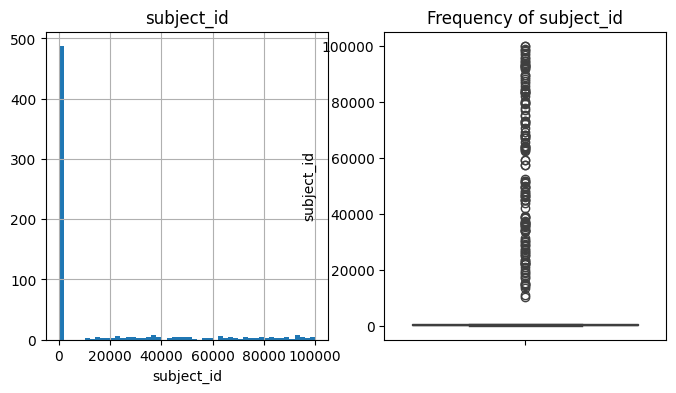

______________________________________________________

bedtime_mssd


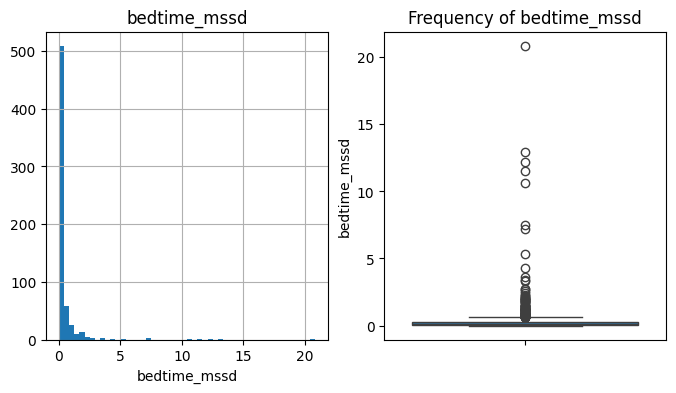

______________________________________________________

TotalSleepTime


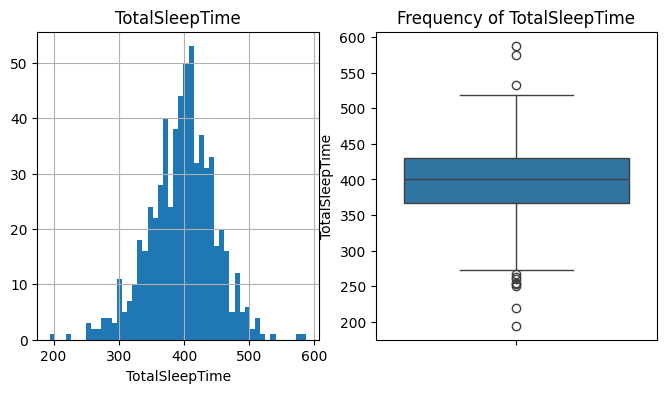

______________________________________________________

midpoint_sleep


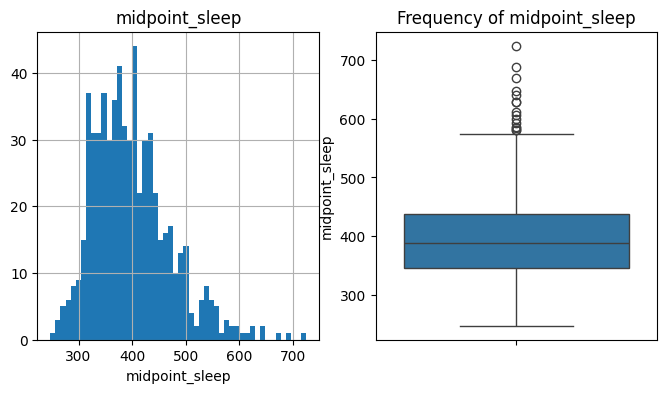

______________________________________________________

frac_nights_with_data


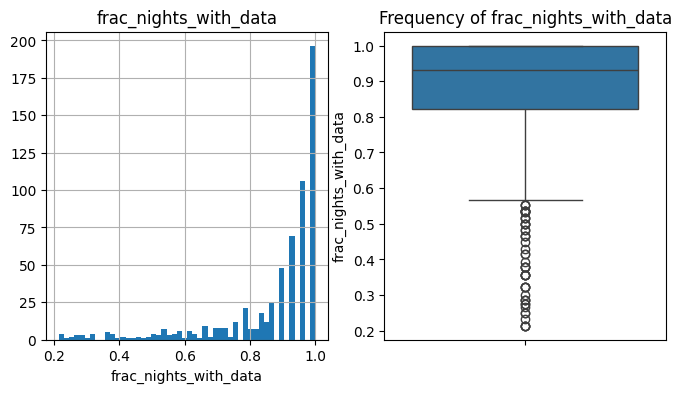

______________________________________________________

daytime_sleep


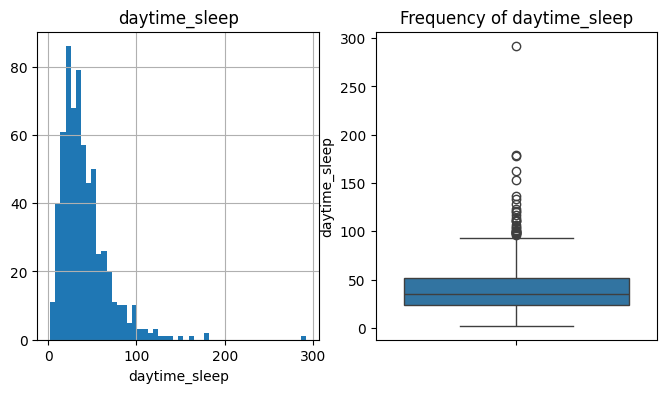

______________________________________________________

cum_gpa


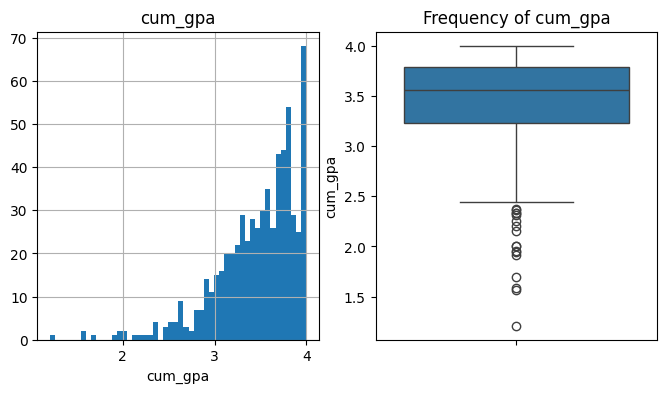

______________________________________________________

term_gpa


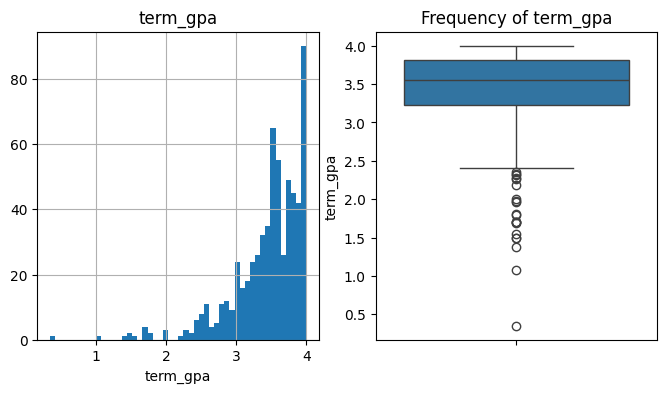

______________________________________________________



In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    #quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    #print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 4))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)
            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(df, col, plot=True)

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in df[num_cols].columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

subject_id False
bedtime_mssd True
TotalSleepTime False
midpoint_sleep False
frac_nights_with_data False
daytime_sleep True
cum_gpa True
term_gpa True


        cohort      Ratio
cohort                   
nh         147  23.186120
uw1        140  22.082019
uw2        139  21.924290
lac1       131  20.662461
lac2        77  12.145110


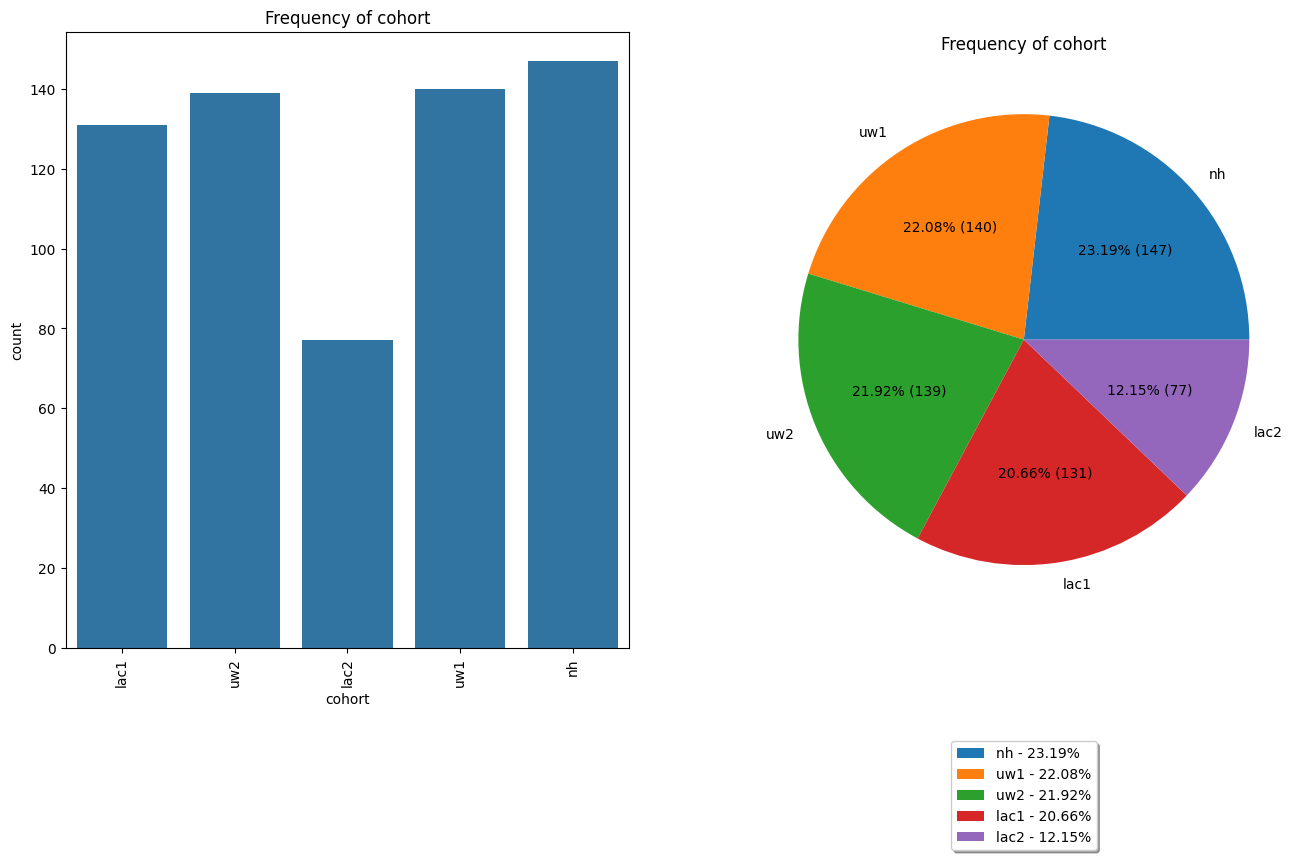

           demo_race      Ratio
demo_race                      
1                514  81.072555
0                119  18.769716
                   1   0.157729


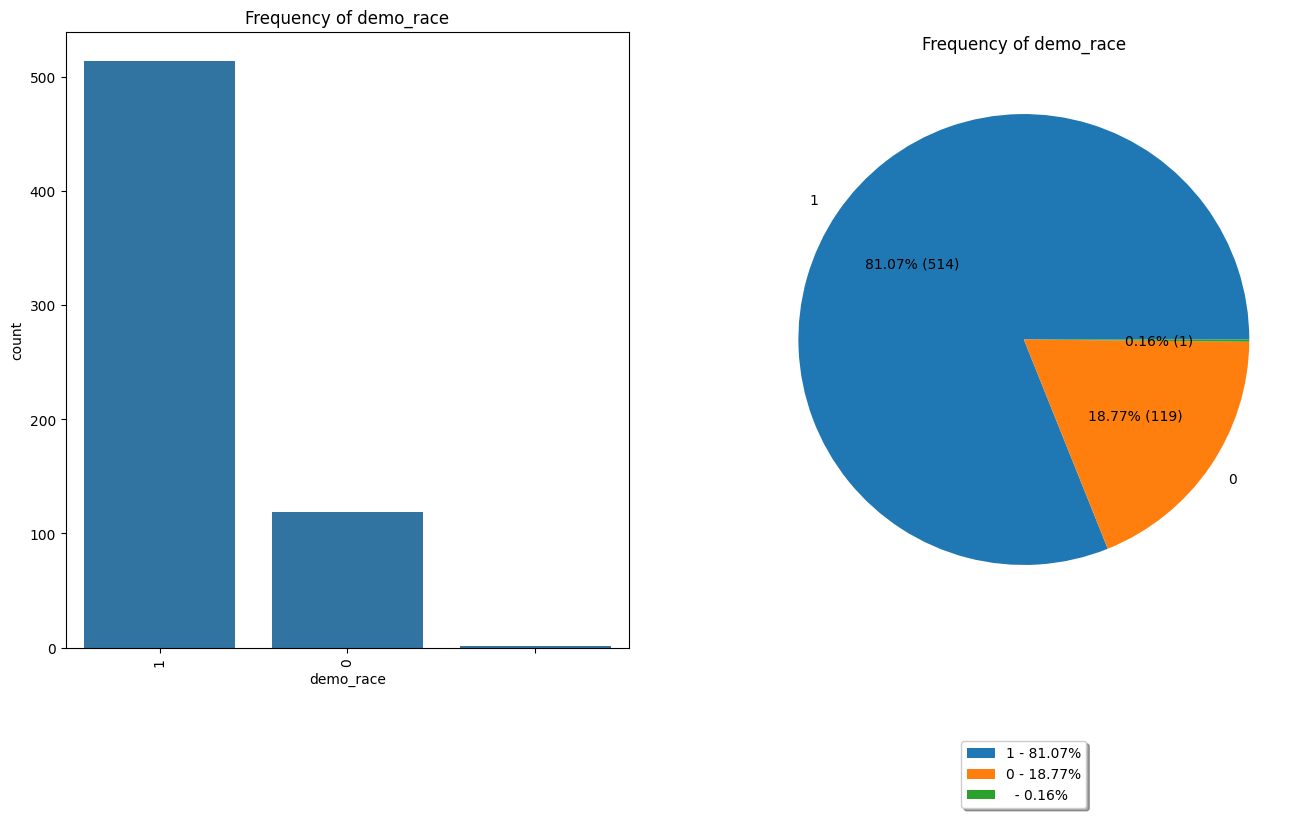

             demo_gender      Ratio
demo_gender                        
1                    368  58.044164
0                    263  41.482650
                       3   0.473186


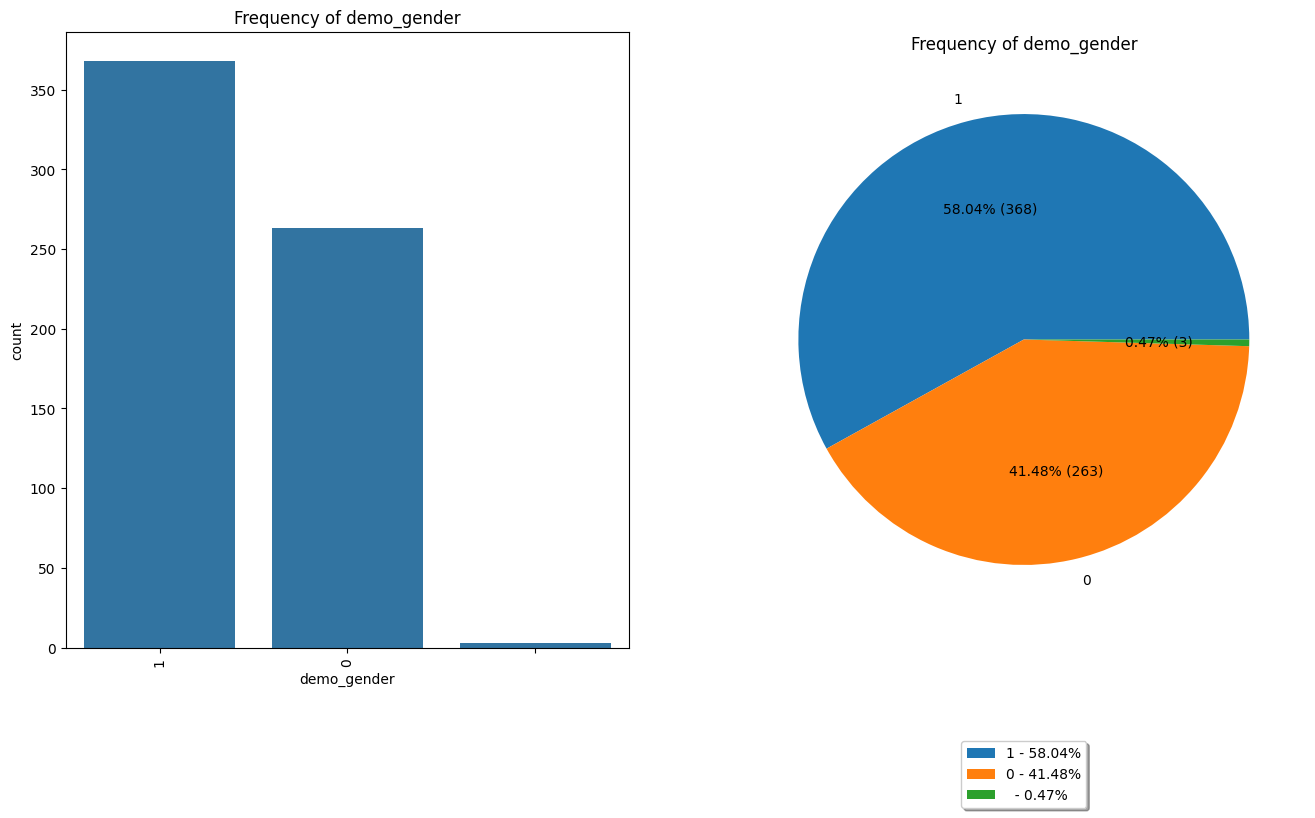

               demo_firstgen      Ratio
demo_firstgen                          
0                        526  82.965300
1                        103  16.246057
                           4   0.630915
2                          1   0.157729


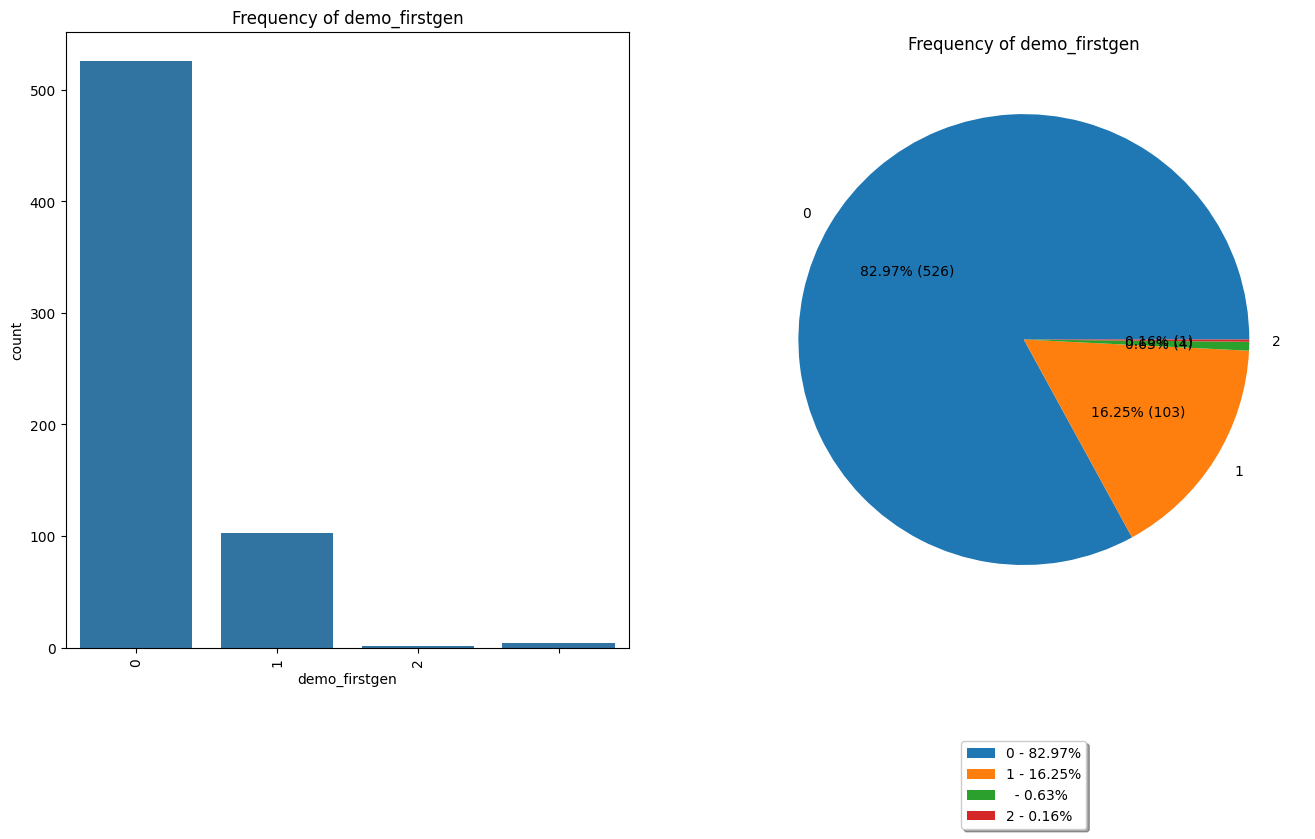

       study      Ratio
study                  
4        147  23.186120
2        140  22.082019
3        139  21.924290
5        131  20.662461
1         77  12.145110


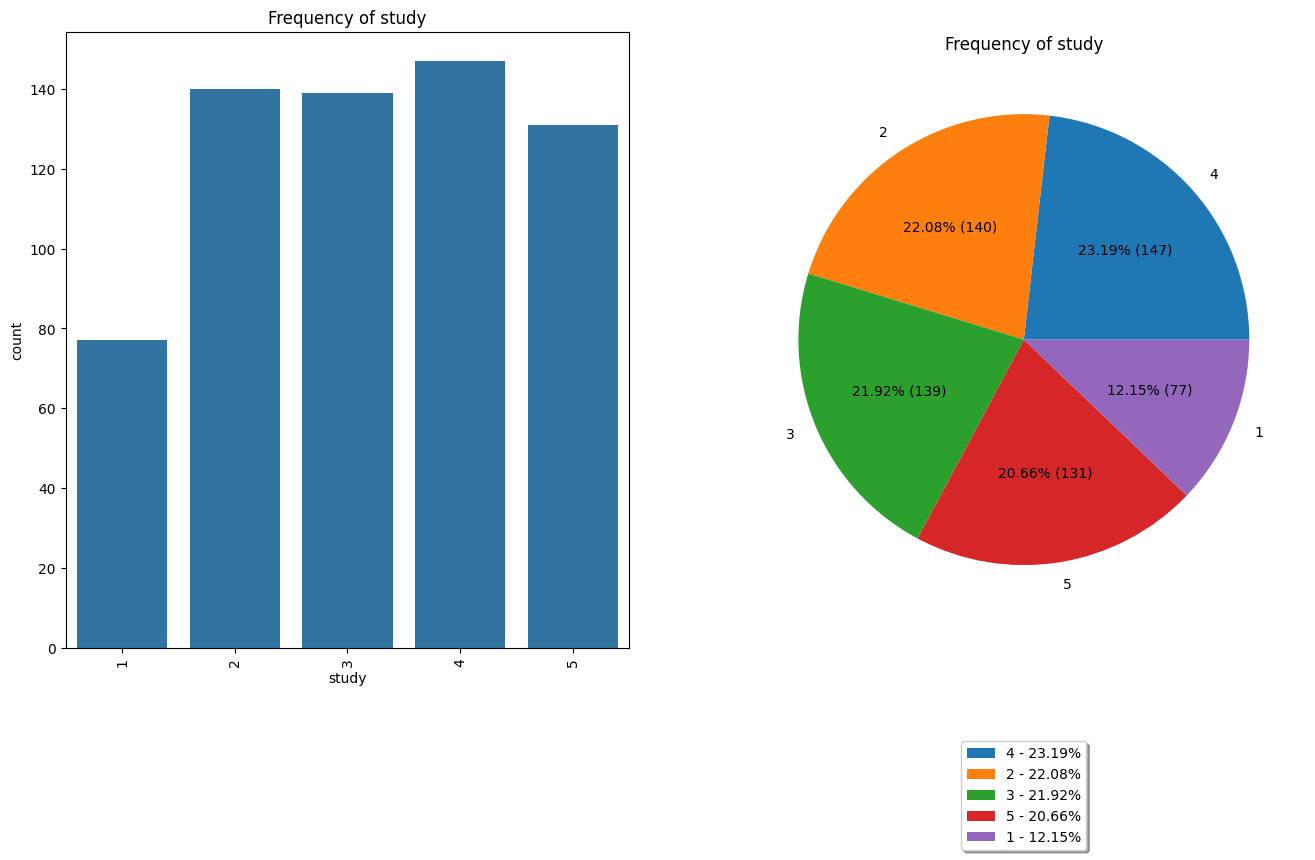

In [ ]:
# Categorical Columns
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(16, 8))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

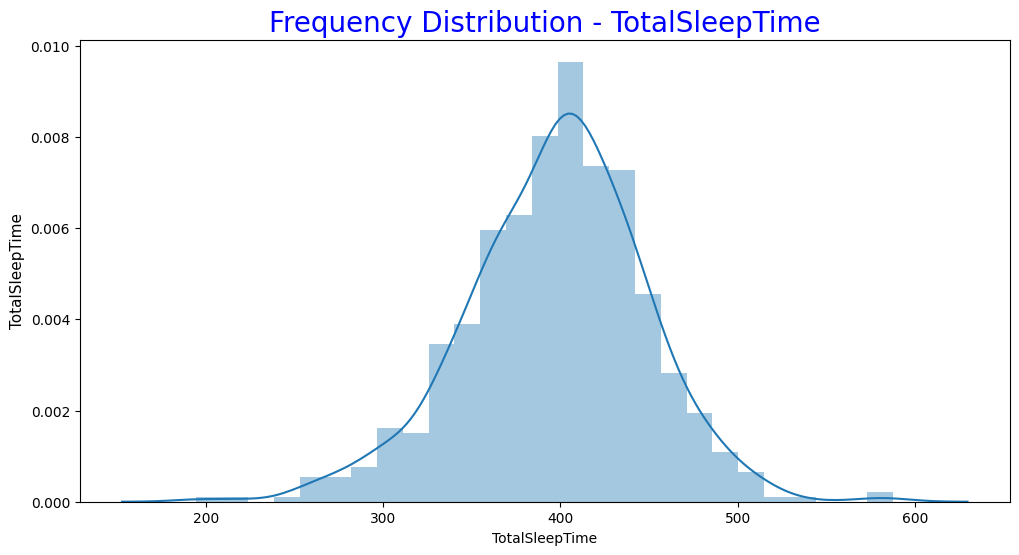

In [ ]:
# Histogram - 'TotalSleepTime'
ax = sns.distplot(df['TotalSleepTime'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution - TotalSleepTime', fontsize=20, color = "blue")
ax.set_ylabel('TotalSleepTime', fontsize=11)
plt.show()

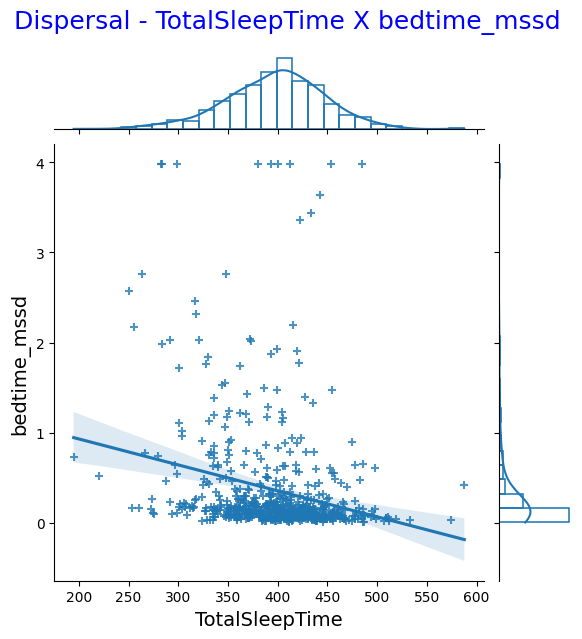

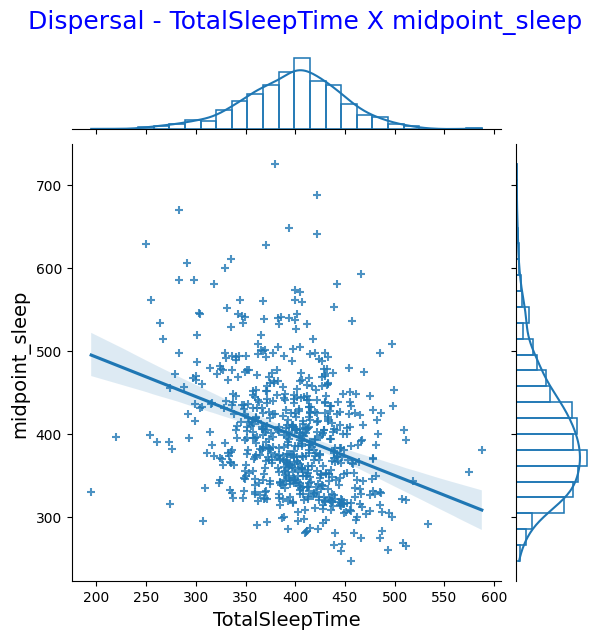

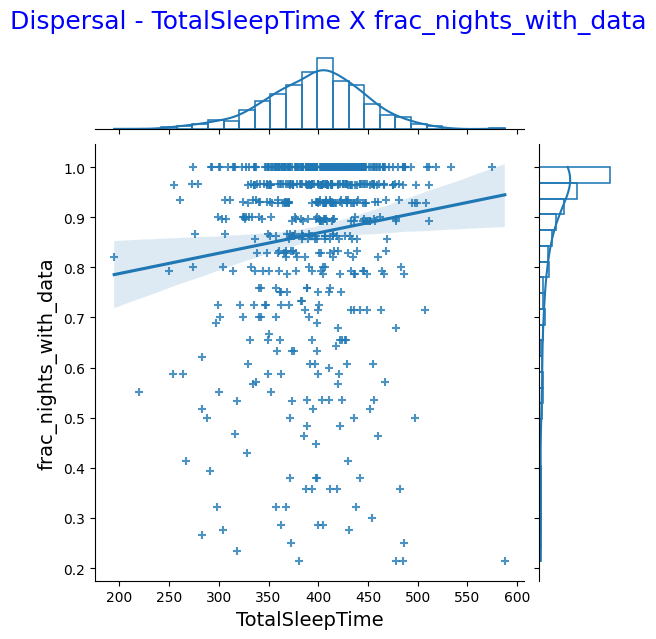

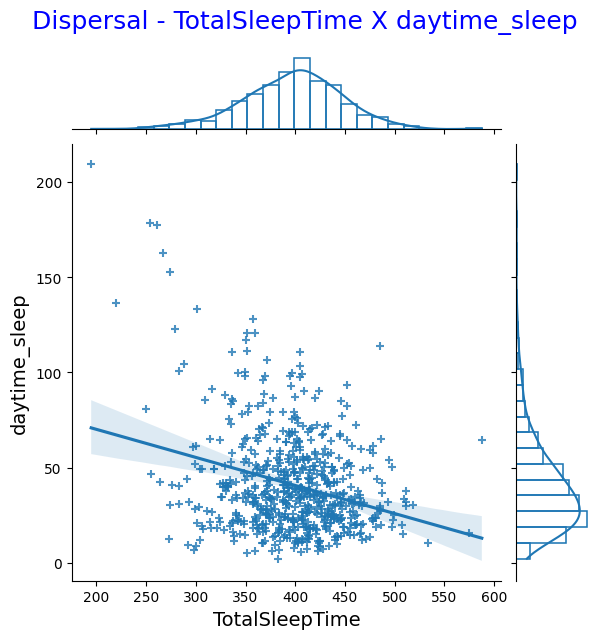

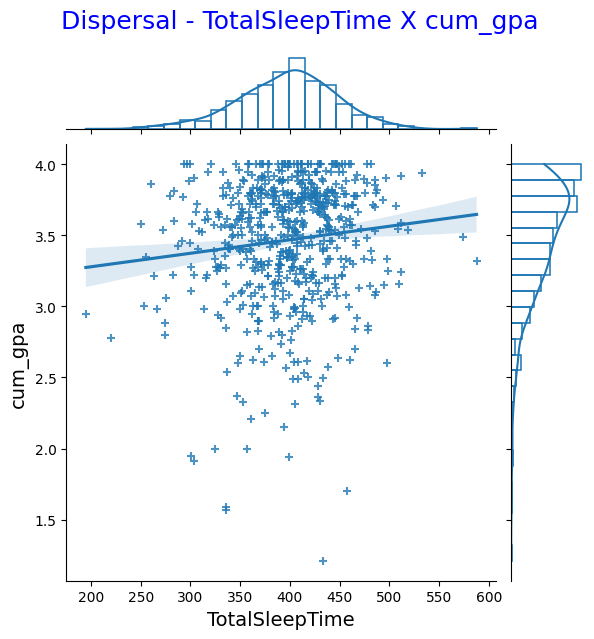

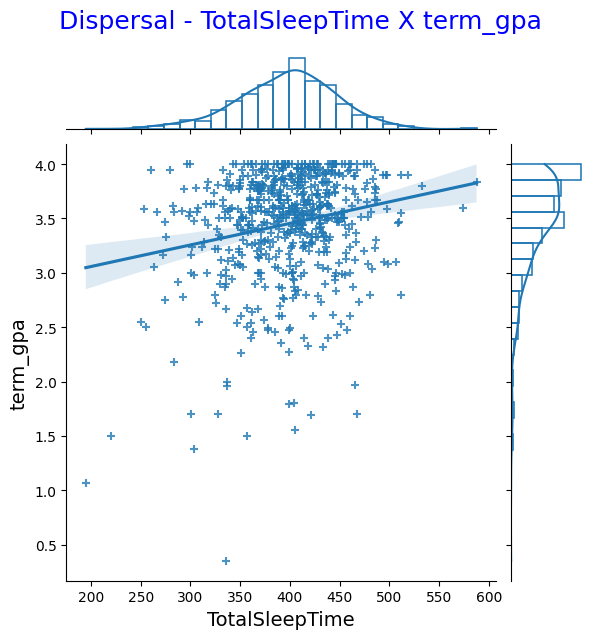

In [ ]:
cols = ['bedtime_mssd', 'midpoint_sleep',
       'frac_nights_with_data', 'daytime_sleep', 'cum_gpa', 'term_gpa']
for i in cols:
    ax = sns.jointplot(x="TotalSleepTime", y=i, data=df, marker="+", marginal_kws=dict(bins=25, fill=False), kind = 'reg')
    ax.fig.suptitle('Dispersal - TotalSleepTime X ' + i, fontsize=18, y=1.05, color = 'blue')
    ax.set_axis_labels("TotalSleepTime", i, fontsize=14)
    plt.show()

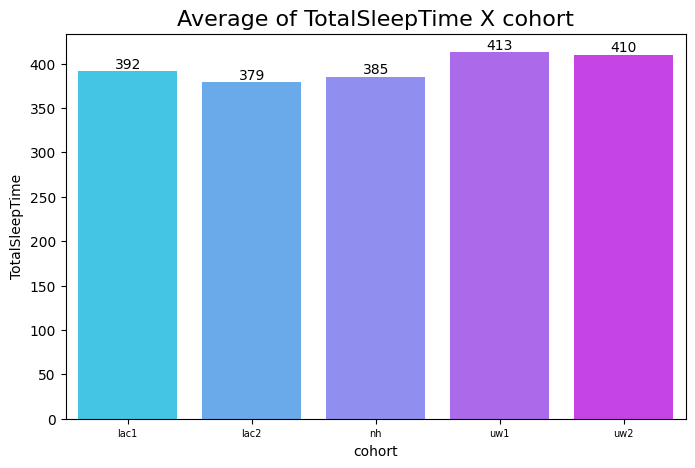

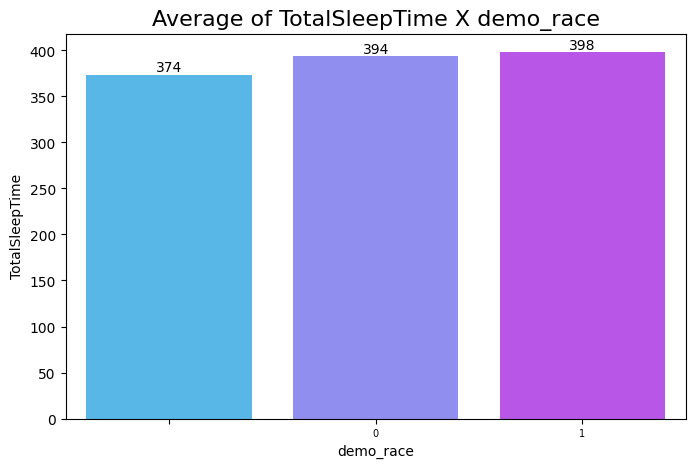

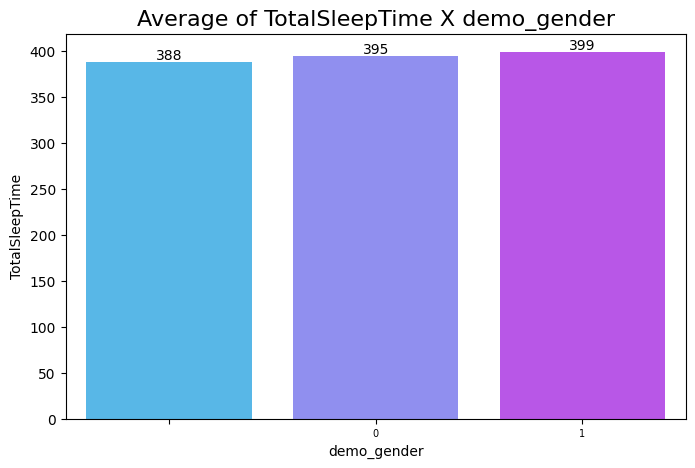

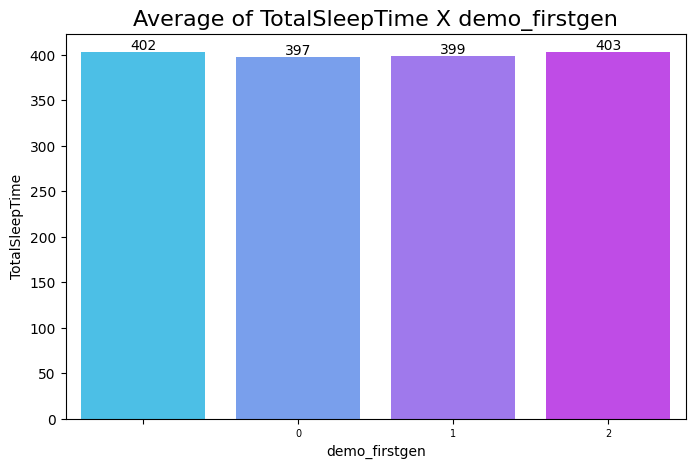

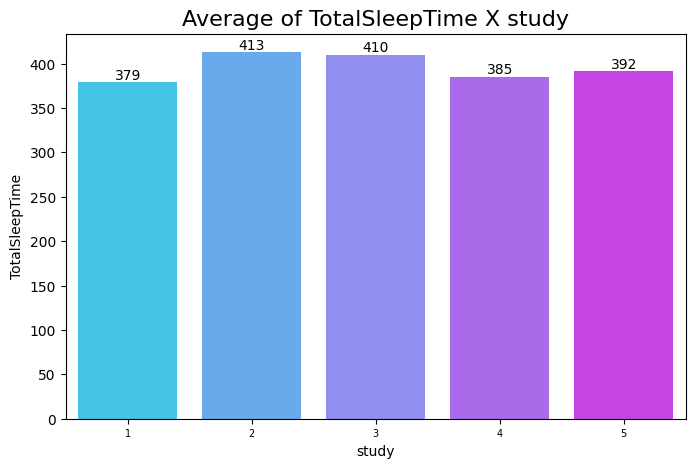

In [ ]:
for i in cat_cols:
    df_cat = df.groupby(i)["TotalSleepTime"].mean().reset_index()
    # create bar plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax = sns.barplot(x = i, y = "TotalSleepTime", data = df_cat, palette = 'cool')
    plt.title("Average of TotalSleepTime X " + i, fontsize = 16)
    plt.xticks(rotation=0, fontsize = 7)


    # Adding labels to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                    xytext = (0, 5), textcoords = 'offset points')

    plt.show()

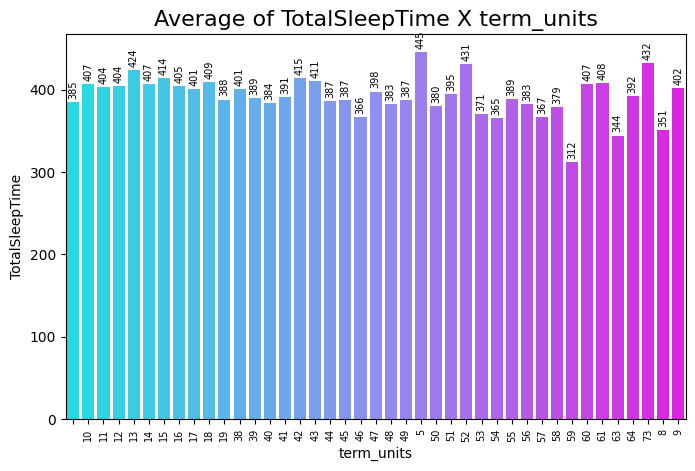

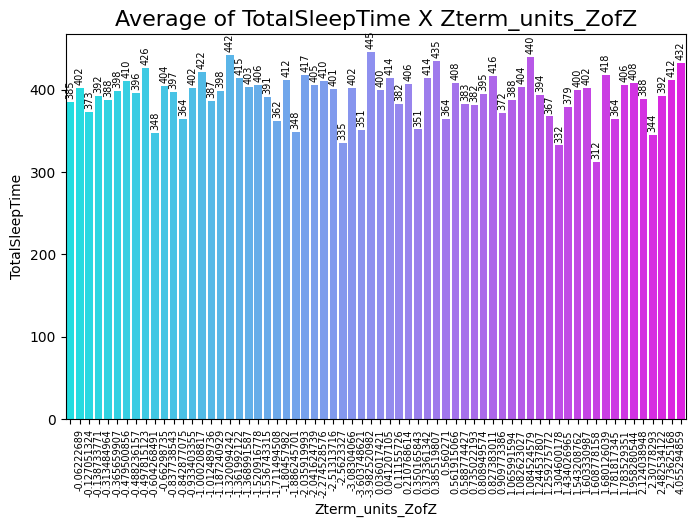

In [ ]:
for i in cat_but_car:
    df_cat = df.groupby(i)["TotalSleepTime"].mean().reset_index()
    #df_cat = df_cat.sort_values(by='TotalSleepTime', ascending=False)

    # create bar plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax = sns.barplot(x = i, y = "TotalSleepTime", data = df_cat, palette = 'cool')
    plt.title("Average of TotalSleepTime X " + i, fontsize = 16)
    plt.xticks(rotation=90, fontsize = 7)


    # Adding labels to each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points', rotation=90, fontsize=7)
    plt.show()

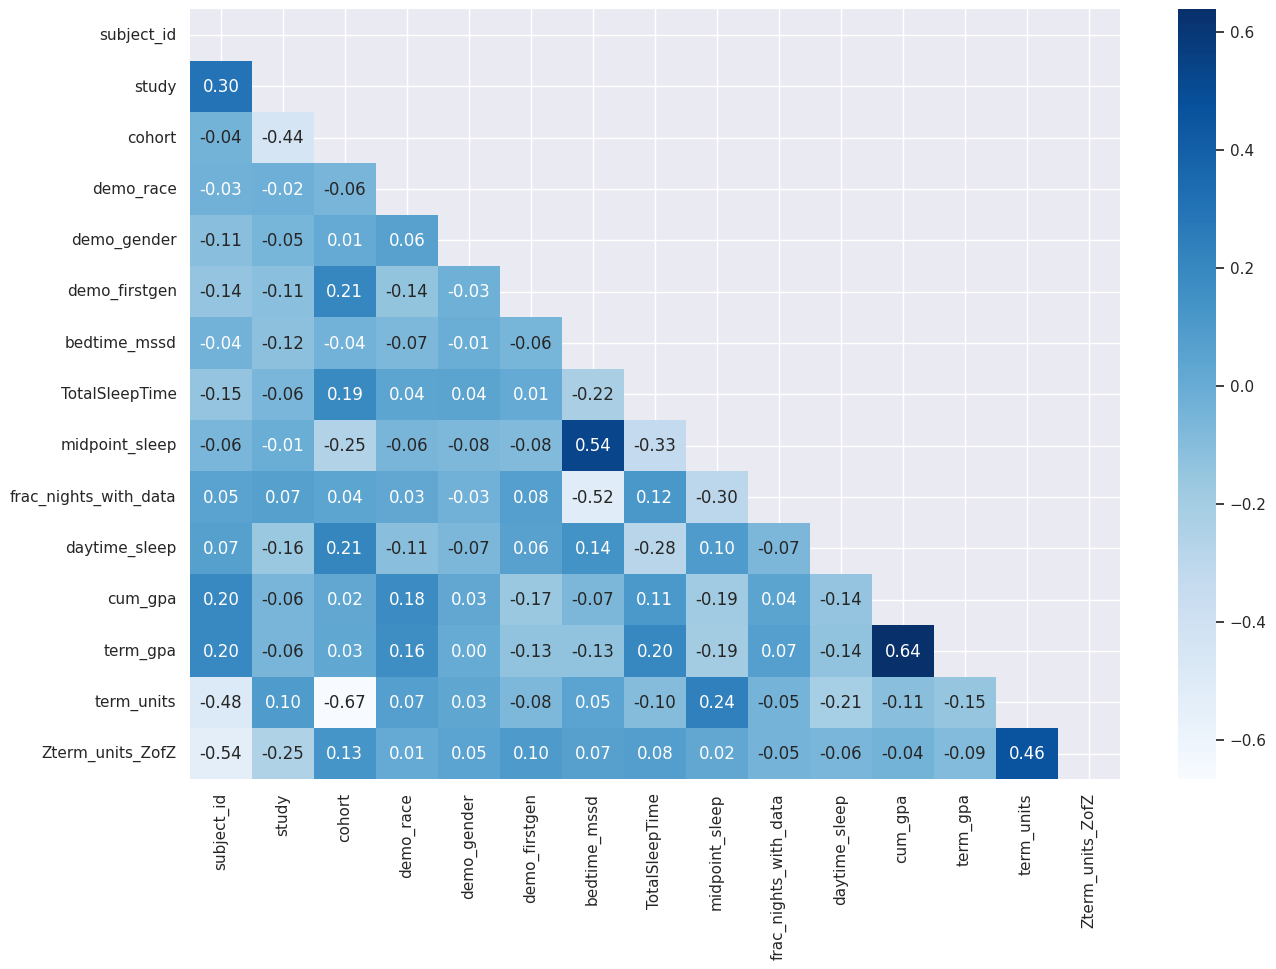

In [ ]:
!pip install scikit-learn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le= LabelEncoder()

for col in df:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize': (15, 10)})
sns.heatmap(corr, mask = mask, cmap="Blues", annot=True, fmt=".2f")
plt.show()

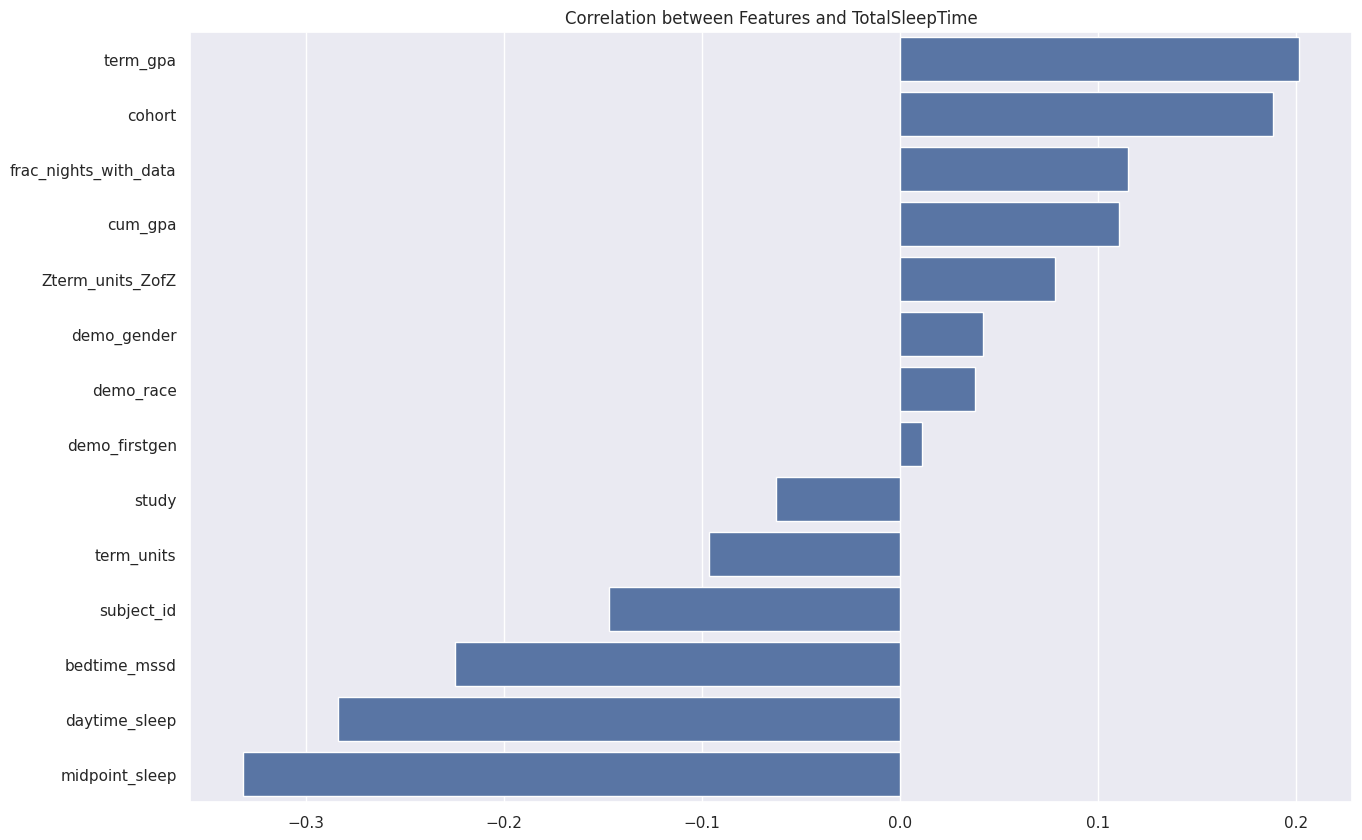

In [ ]:
limite = -1

data = df.corr()["TotalSleepTime"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limite:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlation between Features and TotalSleepTime')
plt.show()

**CMU Sleep - EDA and Analysis**

For many reasons, it’s important for students to succeed during their first year of college. Success during the first year affects whether students will stay to complete the rest of their degree, and college GPA seems to predict future success in jobs. Universities often invest large amounts of time and money to help students adapt to college during their first year, through special programs, tutoring, orientation sessions, and so on.

Besides programs offered by universities, we can also ask what students can do to improve their chances. One potential factor is sleep. College students often have poor sleep habits, staying up late and sleeping short hours, and a great deal of research suggests that lack of sleep can harm cognitive performance. It seems reasonable, then, to study how sleep habits in college students are related to their grade point averages (GPAs).

To assess this, this study recruited first-year students at three universities:

Carnegie Mellon University (CMU), a STEM-focused private university
The University of Washington (UW), a large public university
Notre Dame University (ND), a private Catholic university